In [6]:
import numpy as np
import pandas as pd
data = pd.read_csv(r"Iris.csv",header=0)
#显示前n行记录，默认n值为5data.head()
#尾n行，data.tail()
#随机抽取,默认抽取一条，可以通过参数进行指定样本数量


data.sample(10)
data["Species"]=data["Species"].map({"virginica":0,"setosa":1,"versicolor":2})
#将类别文本映射成数据类型。

data.drop("ID",axis=1,inplace=True)
#删掉ID列，axis=1代表是列，axis默认为0代表是行
data.duplicated().any()
data.drop_duplicates(inplace=True)
#len(data)
data['Species'].value_counts()
#求长度

"""使用python语言实现k近邻算法，实现分类"""
class KNN:
    
    #k是选几个邻居
def  __init__(self,k):
        """初始化方法"""
         #使用k来初始化knn的k
    self.k=k 
def fit(self,X,y): #knn是惰性算法,对于矩阵大写表示，对于向量小写
            """训练方法
            parameters
            X：类数组类型 （类似的数组类型，可以是list numpy—array类型 pandas
            形状为[样本数量，特征数量] [147,4]
            待训练的样本特征（属性） 
            y：类数组类型，形状为][样本数量]
            每个样本的目标值（标签）
            将x转换为ndarry数组类型
            """
    self.X=np.asarray(X)
    self.y=np.assaray(y)
        
def predict(self,X):
        """根据参数传递的样本，对样本数据进行预测
        X：类数组类型，形状为：[样本数量，特征数量]
            带训练的样本特征（属性）
            
        returns
        
        result:数组类型，预测的结果
            
        """
    X=np.asarray(X)
    result=[] 
        #对ndarray数组进行遍历，每次取数组中的一哈昂
        #ndarray可以进行整体运算一行对多行进行广播一样的操作。
        
    for x in X:
            #对于ndarray数组进行遍历，每次取数组的一行
            dis= np.sqrt(np.sum(x-self.X)**2,axis=1)
            #dis.sort是不行的，我还需要知道它原本位置在哪。
            index=dis.argsort()
            #进行阶段，只取前k个元素【去距离最近的k个元素
            index = index[:self.k]
            count= np.bincount(self.y[index])#np.bincount返回数组中每个元素出现的次数，元素必须是非负的整数
            #返回ndarray数组中，值最大的元素对应的索引
            #最大元素就是出现次数最多的元素
            result.append(count.argmax())  #已经使用argmax求出来了，加入到result[]列表中
        return np.asarray(result) 

    
#提取出每个类别鸢尾花的数据
t0 = data[data["Species"]==0]
t1 = data[data["Species"]==1]
t2 = data[data["Species"]==2]

#对每个类别进行洗牌 #指定数据集的数量,random_state打乱顺序还希望顺序回复)
t0 = t0.sample(len(t0),random_state=0)
t1 = t1.sample(len(t1),random_state=0)
t0 = t2.sample(len(t2),random_state=0)
#构建训练集和测试集

#假设前30行当作训练集，需要切割行和列，训练X不应该包括类别，只需要除标签之外的当作特征属性。
train_X=pd.concat([t0.iloc[:30,:-1],t1.iloc[:30,:-1],t1.iloc[:30,:-1]],axis=0)
train_y=pd.concat([t0.iloc[:30,-1],t1.iloc[:30,-1],t1.iloc[:30,-1]],axis=0)
test_X=pd.concat([t0.iloc[30:,:-1],t1.iloc[30:,:-1],t1.iloc[30:,:-1]],axis=0)
test_y=pd.concat([t0.iloc[30:,-1],t1.iloc[30:,-1],t1.iloc[30:,-1]],axis=0)




#创建KNN对象进行训练与测试



knn = KNN(k=3)#假设现在有3个邻居来测试鸢尾花
knn.fit(train_X,train_y)
result=knn.predict(test_X)
#可以使用print和display输出
display(result)
display(test_y)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 28)

      ID  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
80    81           5.5          2.4           3.8          1.1  versicolor
141  142           6.9          3.1           5.1          2.3   virginica
123  124           6.3          2.7           4.9          1.8   virginica
35    36           5.0          3.2           1.2          0.2      setosa
121  122           5.6          2.8           4.9          2.0   virginica
47    48           4.6          3.2           1.4          0.2      setosa
146  147           6.3          2.5           5.0          1.9   virginica
120  121           6.9          3.2           5.7          2.3   virginica
11    12           4.8          3.4           1.6          0.2      setosa
136  137           6.3          3.4           5.6          2.4   virginica
150
鸢尾花测试集test_y中样本分类正确的个数:


57

鸢尾花数据集test_y中分类的正确率:


0.95

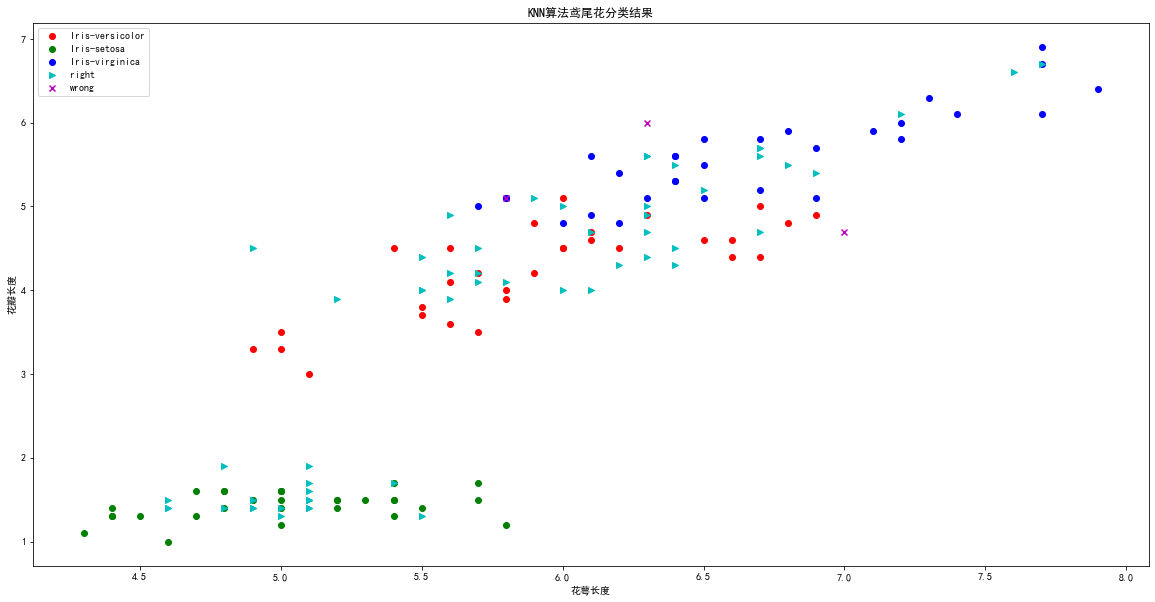

In [7]:
import numpy as np
import pandas as pd
data = pd.read_csv(r"iris.csv", header=0)
# data.head(10)
# data.tail(10)
print(data.sample(10))
data["Species"] = data["Species"].map({"versicolor":0,"setosa":1,"virginica":2}) # 类别名称映射为数字
# data = data.drop("Id",axis=1)  # 删除列
print(len(data))
if data.duplicated().any(): # 重复值
    data.drop_duplicates(inplace=True) #删除重复值
    print(len(data))
data["Species"].value_counts()  # 查看各个类别的鸢尾花记录

class KNN:
    '''使用KNN实现K近邻算法实现分类'''
    def __init__(self, k):
        '''初始化
        
        Parameters
        -----
        k:int
            邻居个位数
        
        '''
        self.k = k
    def fit(self, X, y):
        '''训练
        
        Parameeters
        -----
        X: 类数组类型，可以是List也可以是Ndarray，形状为： [样本数量,特征数量]
        y: 类数组类型，形状为：[样本数量]
        
        '''
        self.X = np.asarray(X) #转换为ndarray类型
        self.y = np.asarray(y)
    def predict(self, X):
        '''对样本进行预测
        Parameters:
        X: 类数组类型，可以是List也可以是Ndarray，形状为： [样本数量,特征数量]
        Returns:
        数组类型，预测结果
        '''
        X = np.asarray(X)
        result = []
        for x in X:
            dis = np.sqrt(np.sum((x-self.X)**2, axis=1)) # 对于测试机的每隔一个样本，一次与训练集的所有数据求欧氏距离
            index = dis.argsort()# 返回排序结果的下标
            index = index[:self.k] # 截取前K个
            count = np.bincount(self.y[index]) # 返回数组中每个整数元素出现次数，元素必须是非负整数
            result.append(count.argmax()) # 返回ndarray中值最大的元素所对应的索引，就是出现次数最多的索引，也就是我们判定的类别
        return np.asarray(result)
    def predict2(self, X):
        '''对样本进行预测，加入权重计算
        Parameters:
        X: 类数组类型，可以是List也可以是Ndarray，形状为： [样本数量,特征数量]
        Returns:
        数组类型，预测结果
        '''
        X = np.asarray(X)
        result = []
        for x in X:
            dis = np.sqrt(np.sum((x-self.X)**2, axis=1)) # 对于测试机的每隔一个样本，一次与训练集的所有数据求欧氏距离
            index = dis.argsort()# 返回排序结果的下标
            index = index[:self.k] # 截取前K个
            count = np.bincount(self.y[index], weights=1/dis[index]) # 返回数组中每个整数元素出现次数，元素必须是非负整数
            result.append(count.argmax()) # 返回ndarray中值最大的元素所对应的索引，就是出现次数最多的索引，也就是我们判定的类别
        return np.asarray(result)
    
# 提取每个类中鸢尾花数据
t0 = data[data["Species"]==0]
t1 = data[data["Species"]==1]
t2 = data[data["Species"]==2]
# 打乱# 打乱每个类别数据
t0 = t0.sample(len(t0), random_state=0)
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)
# 分配训练集和数据集，axis=0表示按纵向方式拼接
train_X = pd.concat([t0.iloc[:30, :-1], t1.iloc[:30, :-1], t2.iloc[:30, :-1]], axis=0)
train_y = pd.concat([t0.iloc[:30, -1], t1.iloc[:30, -1], t2.iloc[:30, -1]], axis=0)
test_X = pd.concat([t0.iloc[30:, :-1], t1.iloc[30:, :-1], t2.iloc[30:, :-1]], axis=0)
test_y = pd.concat([t0.iloc[30:, -1], t1.iloc[30:, -1], t2.iloc[30:, -1]], axis=0)

knn = KNN(k=30)
knn.fit(X=train_X, y=train_y)
result = knn.predict(test_X)
#display(result)
#display(test_y)
#display(result==test_y)

print("鸢尾花测试集test_y中样本分类正确的个数:")
display(np.sum(result == test_y))
print("鸢尾花数据集test_y中分类的正确率:")
display(np.sum(result==test_y)/len(result))

# "Iris-versicolor":0,"Iris-setosa":1,"Iris-virginica":2

import matplotlib as mpl
import matplotlib.pyplot as plt

#默认情况下，matplotlib不支持中文
#设置字体为黑体，设置在中文字体时候，能够正常显示符号
mpl.rcParams["font.family"]="SimHei"
mpl.rcParams["axes.unicode_minus"]=False

# "Iris-versicolor":0,"Iris-setosa":1,"Iris-virginica":2
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
mpl.rcParams["font.family"] = 'SimHei' # 默认mpl不支持中文，设置一下支持 
mpl.rcParams["axes.unicode_minus"] = False # 设置中文字体是可以正常显示负号
plt.scatter(x=t0["Sepal.Length"][:30], y=t0["Petal.Length"][:30], color='r', label="Iris-versicolor")
plt.scatter(x=t1["Sepal.Length"][:30], y=t1["Petal.Length"][:30], color='g', label="Iris-setosa")
plt.scatter(x=t2["Sepal.Length"][:30], y=t2["Petal.Length"][:30], color='b', label="Iris-virginica")
right = test_X[result == test_y]
wrong = test_X[result != test_y]
plt.scatter(x=right["Sepal.Length"], y=right["Petal.Length"], color='c', label="right", marker=">")
plt.scatter(x=wrong["Sepal.Length"], y=wrong["Petal.Length"], color='m', label="wrong", marker="x")
plt.xlabel('花萼长度')
plt.ylabel('花瓣长度')
plt.title('KNN算法鸢尾花分类结果')
plt.legend(loc='best')
plt.show()



In [9]:
import numpy as np
import pandas as pd
data = pd.read_csv(r"Iris.csv",header=0)
data.sample(10)
#将类别文本映射成数据类型。
data["Species"]=data["Species"].map({"virginica":0,"setosa":1,"versicolor":2})
data.drop("ID",axis=1,inplace=True)#删掉ID列
data.duplicated().any()
data.drop_duplicates(inplace=True)
data['Species'].value_counts()
data.sample(10)

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.7 from "D:\Anaconda3\envs\pytorch_gpu\python.exe"
  * The NumPy version is: "1.21.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed: 找不到指定的模块。


In [7]:
#提取出每个类别鸢尾花的数据
t0 = data[data["Species"]==0]
t1 = data[data["Species"]==1]
t2 = data[data["Species"]==2]

#对每个类别进行洗牌 
t0 = t0.sample(len(t0),random_state=0)
t1 = t1.sample(len(t1),random_state=0)
t0 = t2.sample(len(t2),random_state=0)
#构建训练集和测试集

#假设前40行当作训练集，需要切割行和列，训练X不应该包括类别，只需要除标签之外的当作特征属性。
train_X=pd.concat([t0.iloc[:40,:-1],t1.iloc[:40,:-1],t1.iloc[:40,:-1]],axis=0)
train_y=pd.concat([t0.iloc[:40,-1],t1.iloc[:40,-1],t1.iloc[:40,-1]],axis=0)
test_X=pd.concat([t0.iloc[40:,:-1],t1.iloc[40:,:-1],t1.iloc[40:,:-1]],axis=0)
test_y=pd.concat([t0.iloc[40:,-1],t1.iloc[40:,-1],t1.iloc[40:,-1]],axis=0)

NameError: name 'data' is not defined

      ID  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
70    71           5.9          3.2           4.8          1.8  versicolor
35    36           5.0          3.2           1.2          0.2      setosa
97    98           6.2          2.9           4.3          1.3  versicolor
148  149           6.2          3.4           5.4          2.3   virginica
133  134           6.3          2.8           5.1          1.5   virginica
1      2           4.9          3.0           1.4          0.2      setosa
98    99           5.1          2.5           3.0          1.1  versicolor
57    58           4.9          2.4           3.3          1.0  versicolor
89    90           5.5          2.5           4.0          1.3  versicolor
142  143           5.8          2.7           5.1          1.9   virginica
150


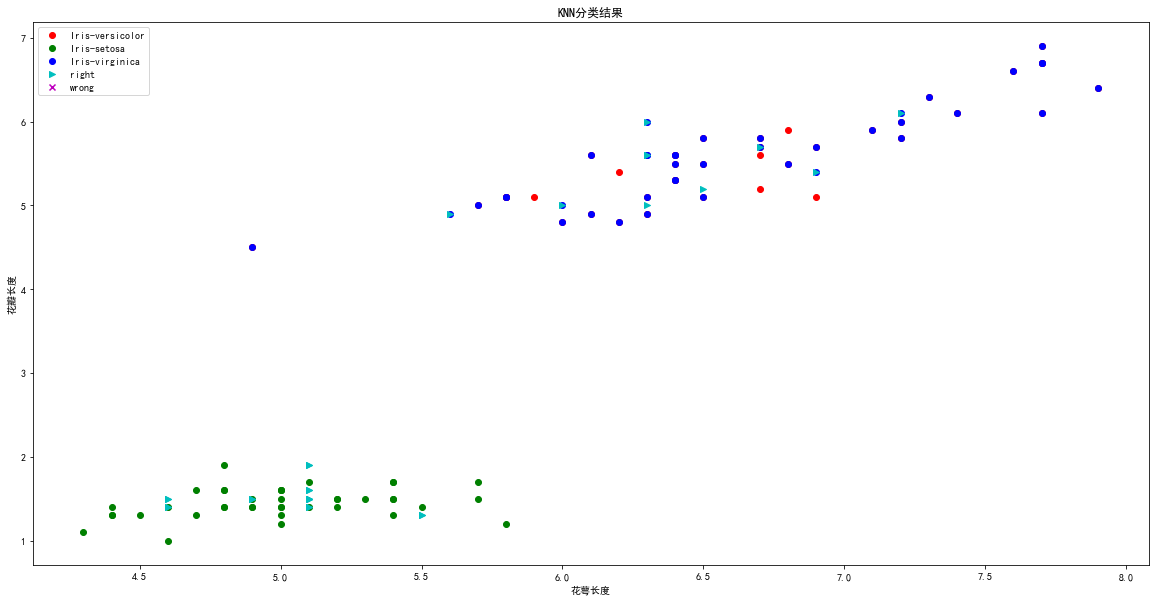

In [3]:
import numpy as np
import pandas as pd
data = pd.read_csv(r"iris.csv", header=0)
# data.head(10)
# data.tail(10)
print(data.sample(10))
data["Species"] = data["Species"].map({"versicolor":0,"setosa":1,"virginica":2}) # 类别名称映射为数字
# data = data.drop("Id",axis=1)  # 删除列
print(len(data))
if data.duplicated().any(): # 重复值
    data.drop_duplicates(inplace=True) #删除重复值
    print(len(data))
data["Species"].value_counts()  # 查看各个类别的鸢尾花记录

class KNN:
    '''K近邻算法实现分类'''
    def __init__(self, k):
        self.k = k
    def fit(self, X, y):
        self.X = np.asarray(X) 
        self.y = np.asarray(y)
    def predict(self, X):
        X = np.asarray(X)
        result = []
        for x in X:
            dis = np.sqrt(np.sum((x-self.X)**2, axis=1)) 
            index = dis.argsort()
            index = index[:self.k] 
            count = np.bincount(self.y[index]) 
            result.append(count.argmax()) 
        return np.asarray(result)

knn = KNN(k=30)
knn.fit(X=train_X, y=train_y)
result = knn.predict(test_X)


# "Iris-versicolor":0,"Iris-setosa":1,"Iris-virginica":2

import matplotlib as mpl
import matplotlib.pyplot as plt

#默认情况下，matplotlib不支持中文
#设置字体为黑体，设置在中文字体时候，能够正常显示符号
mpl.rcParams["font.family"]="SimHei"
mpl.rcParams["axes.unicode_minus"]=False

# "Iris-versicolor":0,"Iris-setosa":1,"Iris-virginica":2
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
mpl.rcParams["font.family"] = 'SimHei' # 默认mpl不支持中文，设置一下支持 
mpl.rcParams["axes.unicode_minus"] = False # 设置中文字体是可以正常显示负号
plt.scatter(x=t0["Sepal.Length"][:40], y=t0["Petal.Length"][:40], color='r', label="Iris-versicolor")
plt.scatter(x=t1["Sepal.Length"][:40], y=t1["Petal.Length"][:40], color='g', label="Iris-setosa")
plt.scatter(x=t2["Sepal.Length"][:40], y=t2["Petal.Length"][:40], color='b', label="Iris-virginica")
right = test_X[result == test_y]
wrong = test_X[result != test_y]
plt.scatter(x=right["Sepal.Length"], y=right["Petal.Length"], color='c', label="right", marker=">")
plt.scatter(x=wrong["Sepal.Length"], y=wrong["Petal.Length"], color='m', label="wrong", marker="x")
plt.xlabel('花萼长度')
plt.ylabel('花瓣长度')
plt.title('KNN分类结果')
plt.legend(loc='best')
plt.show()



In [12]:
print(int(3/2))


1
